# Working with Data


We will learn how to work with data on a bare-metal 
level - just raw Python.  Later we will learn to use
(and to appreciate) powerful data manipulation packages
like Pandas.  As you will see, a good deal of effort
has to be put into "cleaning" the data and brining 
it to the right form.

The first task is to read data from a file.  The file
is "global_temperature_anomalies.text".  We begin 
by reading it into a string:

In [1]:
def read_file(file_name):
    file = open(file_name)
    data = file.read()
    file.close()
    return data

data_as_string = read_file('global_temperature_anomaly.csv')

In [2]:
data_as_string[:600]

# Note the use of slices to view just part of the data.

'# Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature\n# Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv\n# Global Land and Ocean Temperature Anomalies, January-December\n# Units: Degrees Celsius\n# Base Period: 1901-2000\n# Missing: -999\n# Year,Value\n1880,-0.12\n1881,-0.07\n1882,-0.07\n1883,-0.15\n1884,-0.21\n1885,-0.22\n1886,-0.21\n1887,-0.25\n1888,-0.15\n1889,-0.10\n1890,-0.33\n1891,-0.25\n1892,-0.30\n1893,-0.31\n1894,-0.28\n1895,-0.22\n1896,-0.09\n1897,-0.12\n1898,-0.26\n1899,-0.12\n1900,-0.07\n1901,-0.14\n1902,-0.2'

In [3]:
# Ugh! Very hard to read. Let's split the data into list of lines.

def string_to_lines(data):
    return data.split("\n")

data_as_lines = string_to_lines(data_as_string)

data_as_lines[:12]

['# Source: https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature',
 '# Data source: https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/ytd/12/1880-2016.csv',
 '# Global Land and Ocean Temperature Anomalies, January-December',
 '# Units: Degrees Celsius',
 '# Base Period: 1901-2000',
 '# Missing: -999',
 '# Year,Value',
 '1880,-0.12',
 '1881,-0.07',
 '1882,-0.07',
 '1883,-0.15',
 '1884,-0.21']

In [4]:
# We need to get rid of lines that don't have data in them.
# To do this we use array slices.  We will omit the first
# seven line as well as the very last line:

good_lines = data_as_lines[7:-1]  

good_lines[:4]

['1880,-0.12', '1881,-0.07', '1882,-0.07', '1883,-0.15']

In [5]:
# OK, this is looking much better!  But there is one more 
# step.  We have to split each line into the year and the 
# temperature anomaly:

data = list(map(lambda x: x.split(","), good_lines))

data[:4]

[['1880', '-0.12'], ['1881', '-0.07'], ['1882', '-0.07'], ['1883', '-0.15']]

In [6]:
# Once we have have done this, we can separate the 
# years from the anomalies and convert the strings to
# floating point numbers

years = list(map(lambda x: float(x[0]), data))
anomalies = list(map(lambda x: float(x[1]), data))

years[:3], anomalies[:3], len(years), len(anomalies)

([1880.0, 1881.0, 1882.0], [-0.12, -0.07, -0.07], 137, 137)

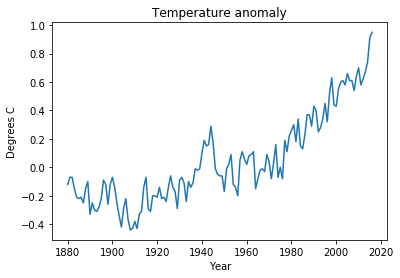

In [7]:
# And now we can make a plot of the data:

from matplotlib import pyplot as plt

%matplotlib inline

plt.plot(years, anomalies)
plt.title("Temperature anomaly")
plt.ylabel("Degrees C")
plt.xlabel("Year")
plt.savefig('anomalies.png')



In [8]:
# We are now going to smooth the data using 
# moving averates.  This is a way to better
# see long term trends unobscured by short-term
# variation

def smooth(data, window):
  output = []
  n = len(data)
  for k in range(0, n - window + 1):
      segment = data[k:(k + window)]
      value = sum(segment)/window
      output.append(value)
  return output

def drop_window(data, window):
  return data[window-1:]

128 128 128


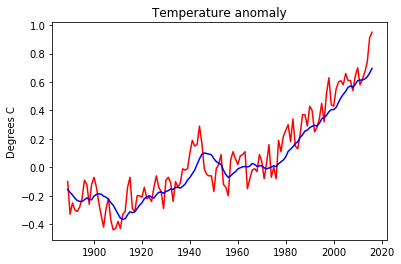

<Figure size 432x288 with 0 Axes>

In [9]:
window = 10
years2 = drop_window(years, window)
anomalies1 = drop_window(anomalies, window)
anomalies2 = smooth(anomalies,window)

print (len(years2), len(anomalies1), len(anomalies2))

plt.plot( years2, anomalies1, color='red', linestyle='solid')
plt.plot( years2, anomalies2, color='blue', linestyle='solid')
plt.title("Temperature anomaly")
plt.ylabel("Degrees C")

plt.show()
plt.savefig('smoothed_anomalies.png')

In [10]:
# Let's find a line which "best fits" the data.
# The function np.polyfit will give us the coefficents

import numpy as np

m, b = np.polyfit(years2, anomalies1, 1)

In [11]:
# Using these coefficents, we define a function y(x)
# which parameterizes the line

def y(x):
   return m*x + b

# And we can use it to make a predicttion of the temperature
# anomaly in 2040:

y(2040)

0.730008154413115

In [12]:
# To see whether this was a good prediction, 
# lets graph the line against that data. First,
# the data for that line:

linfit = list(map(lambda x: y(x), years2))

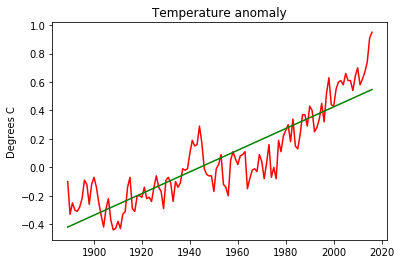

In [13]:
# We can draw a data with a line

plt.plot( years2, anomalies1, color='red', linestyle='solid')
# plt.plot( years2, anomalies2, color='blue', linestyle='solid')
plt.plot( years2, linfit, color='green', linestyle='solid')
plt.title("Temperature anomaly")
plt.ylabel("Degrees C")

plt.show()


In [14]:
# (1) Why is our line of best fit misleading?
# (2) Why is our predicted temperature anomaly clearly flawed?
# (3) How might we make a better prediction?

In [15]:
years2.index(1980)

91

In [16]:
years_pt1 = years[:91]
anomalies_pt1 = anomalies[:91]
m1, b1 = np.polyfit(years_pt1, anomalies_pt1, 1)
def y1(x):
    return m1*x + b1
m1, b1

(0.003605828953655049, -7.067264691829925)

In [17]:
years_pt2 = years[91:]
anomalies_pt2 = anomalies[91:]
m2, b2 = np.polyfit(years_pt2, anomalies_pt2, 1)
def y2(x):
    return m2*x + b2
m2, b2

(0.017620721554116488, -34.73212580943555)

In [18]:
def yy(x): 
    if x <= 1980:
        return y1(x)
    else:
        return y2(x)

yy(2040)

1.2141461609620805

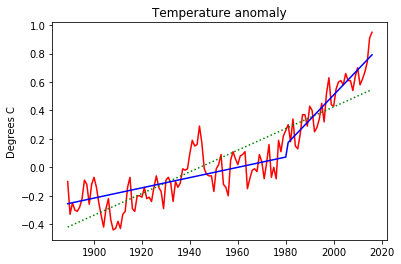

In [19]:
brokenlinfit = list(map(lambda x: yy(x), years2))

plt.plot( years2, anomalies1, color='red', linestyle='solid')
# plt.plot( years2, anomalies2, color='blue', linestyle='solid')
plt.plot( years2, linfit, color='green', linestyle='dotted')
plt.plot( years2, brokenlinfit, color='blue', linestyle='solid')
plt.title("Temperature anomaly")
plt.ylabel("Degrees C")

plt.show()

In [20]:
y1(1940), yy(1940)

(-0.07195652173912936, -0.07195652173912936)

In [21]:
y2(2000), yy(2000)

(0.509317298797427, 0.509317298797427)